## 1. Importing Libra and other dependencies <a name="import"></a>

Import Libra and other dependencies such as numpy and matplotlib

In [1]:
import os
import sys
import time
import math

# Fisrt, we add the location of the library to test to the PYTHON path
from liblibra_core import *
from libra_py import units
import libra_py.workflows.nbra.lz as lz
import libra_py.workflows.nbra.step4 as step4
from libra_py import data_visualize
from libra_py import data_conv, data_stat, data_outs, data_read
from libra_py import fit
import libra_py.workflows.nbra.decoherence_times as decoherence_times
from libra_py import influence_spectrum

import numpy as np
import h5py
import matplotlib.pyplot as plt

colors = {}
colors.update({"1": '#000000'})  # Black 
colors.update({"2": '#000099'})  # Blue  
colors.update({"3": '#006400'})  # Green 
colors.update({"4": '#990000'})  # Red   
colors.update({"5": '#8B008B'})  # Purple
colors.update({"6": '#FF8C00'})  # Orange
colors.update({"9": '#4d4d4d'})  # Gray  
color_index = ["1","2","3","4","5","6","9"]


colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24",
              "11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24",
              "11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"  ]


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::v

## 2. Read the results of the NBRA NAMD calculations<a name="setup"></a>
[Return to Table of contents](#toc)

The NBRA NAMD is run using the function step4.run(). We pass the vibronic Hamiltonian and the parameters dictionary to the function. The function returns a list with the NAMD data for all time-steps and all states. The list takes the following form:

res = MATRIX(nsteps, 3*nstates+4): the trajectory (and initial-condition)-averaged observables, the assumed format is: 

Any given row of the res matrix takes the following form:

First state info        ...  N-st state info All-states-related data  
E(0), P_SE(0), P_SH(0), ...,   E(nst-1), P_SE(nst-1), P_SH(nst-1), <E*P_SE>, <E*P_SH>, sum{P_SE}, sum{P_SH}

Now, we will plot the results. First, we must extract the data from the res list of lists. Recall that res (herein called res_istate_lumo_p_3) is of type MATRIX. That is, it is a custom Libra data type called MATRIX. Now, the index of the lumo state here is 6 from 9. The first column is for the time. The next three columns are E(0), P_SE(0), P_SH(0), where 0 is for the first state included in the active state. Therefore, the surface hopping populations as a function of time for the 0th state in the active space is index 3 from 0. Thus, the surface hopping populations as a function of time for the 1st state in the active space is index 6 from 0. Given that the lumo KS orbital is the 1st state in our active space (recall above), we extract it at each step via using .get(t,6), as shown below.
<a name="unpack2_toc"></a>
<a name="plot_nparrays_toc"></a>

In [2]:
!tar -xf namd_res.tar.bz2

======= Running initial state 1 =======
    *** Running decoherence method 0 ( FSSH ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.0930440175602937e-08  1/B =  91487623.91399656
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  8.403830041981745e-09  1/B =  118993363.14566703
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  9.3823924083847e-09  1/B =  106582623.75663766
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  9.180661343666784e-09  1/B =  108924614.7490064
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.1712757406625476e-08  1/B =  85376992.39244354
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.1712757406625476e-08  1/B =  85376992.39244354
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.0930440175602937e-08  1/B =  91487623.91399656
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  9.445285503076145e-09  1/

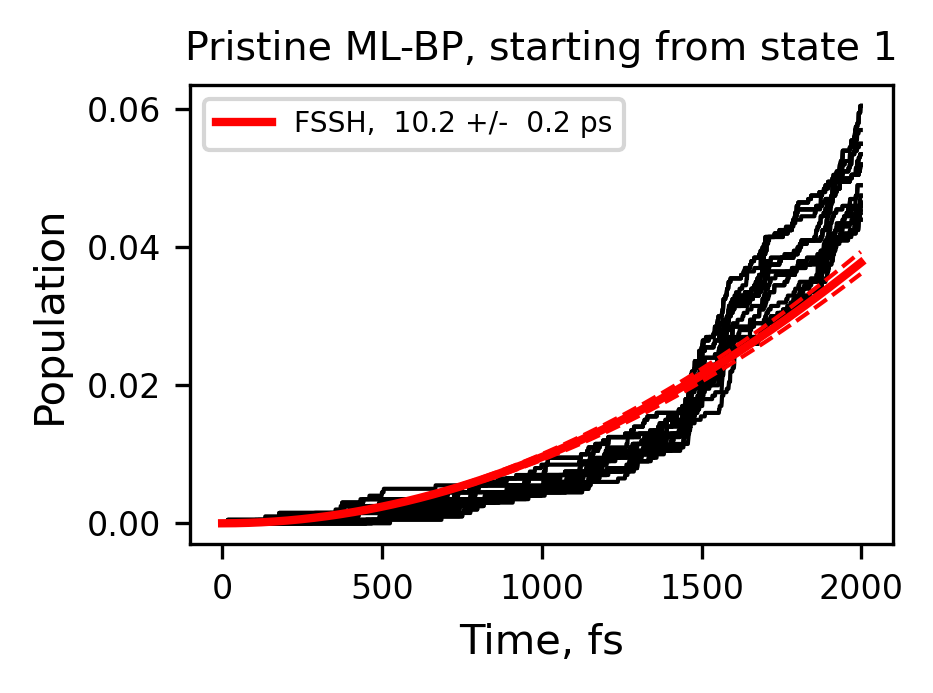

    *** Running decoherence method 1 ( IDA ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.495910323871067e-09  1/B =  181953478.3267071
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.231135325979136e-09  1/B =  236343185.2108365
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.373250405881663e-09  1/B =  186107090.58066246
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.373250405881663e-09  1/B =  186107090.58066246
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.2000363576508154e-09  1/B =  192306347.72941533
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  6.355121387761869e-09  1/B =  157353406.64392525
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  3.7516733702577404e-09  1/B =  266547724.52413678
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.612509713701382e-09  1/B =  216801711.44778663
raw data lengt

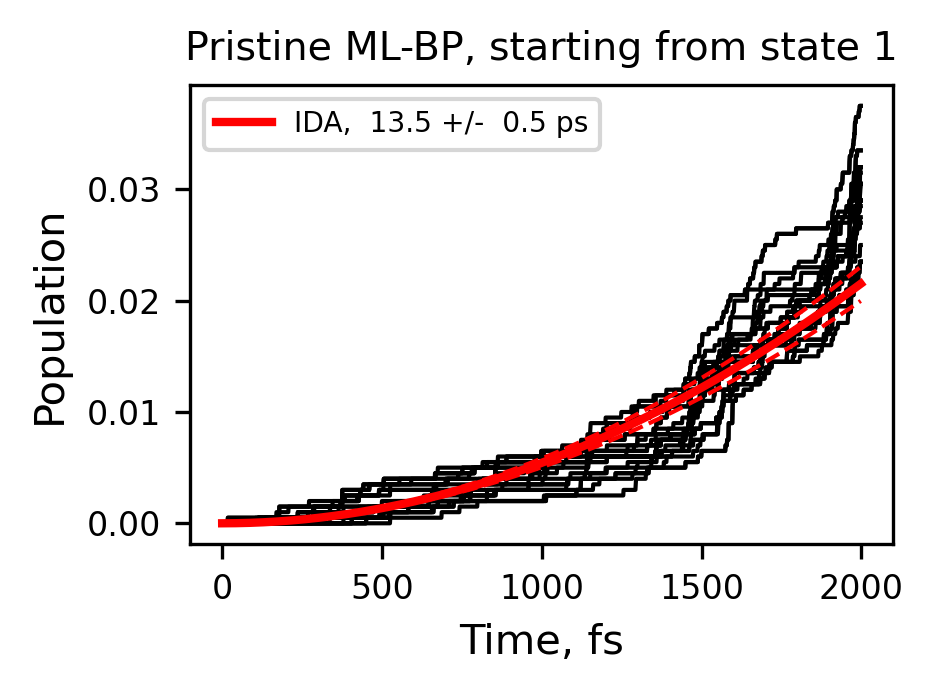

    *** Running decoherence method 2 ( mSDM ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.4064539649458464e-09  1/B =  711007985.2762928
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  3.0094154659684136e-10  1/B =  3322904435.4572206
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.671945901120283e-10  1/B =  1763063360.323107
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.1883361759791174e-09  1/B =  841512713.5013459
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.2006541727108793e-09  1/B =  832879294.245207
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.3585631856960164e-09  1/B =  736071763.5578223
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.0625992815854926e-09  1/B =  941088533.8713114
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  3.3087446300657165e-10  1/B =  3022294289.239658
raw data lengt

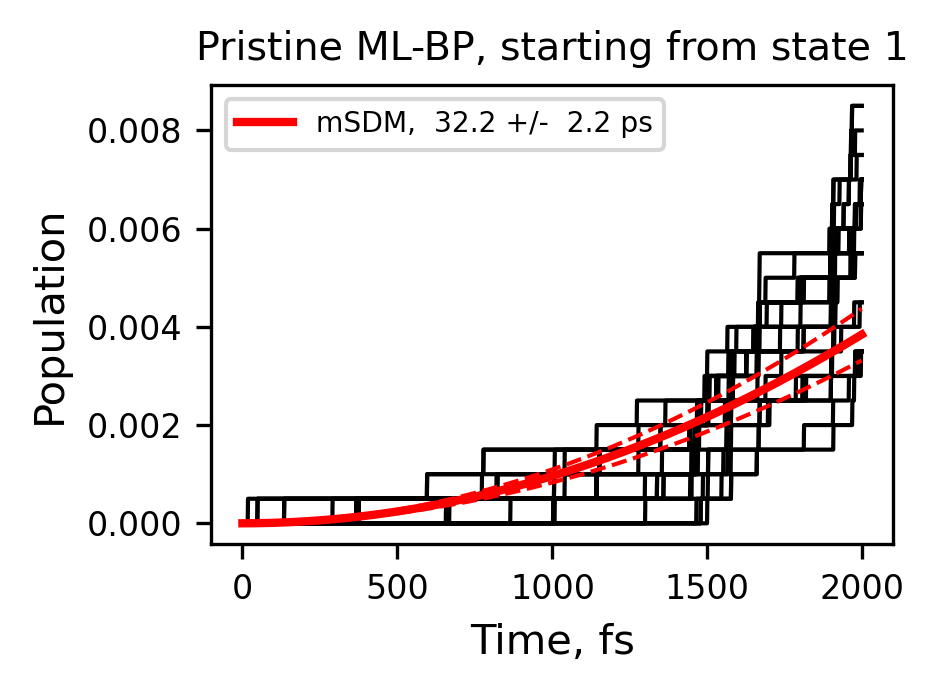

    *** Running decoherence method 21 ( mSDM2 ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  7.510993468181696e-10  1/B =  1331381799.539876
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.0307010640300483e-09  1/B =  970213415.7987508
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  8.303054098752527e-10  1/B =  1204376110.412484
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  9.69066134390653e-10  1/B =  1031921315.2864931
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  8.28274455151878e-10  1/B =  1207329278.0913222
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.6420199293286683e-09  1/B =  609006006.649898
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  8.271827004308379e-10  1/B =  1208922768.185493
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.0372587686956118e-09  1/B =  964079581.8554844
raw data lengths:

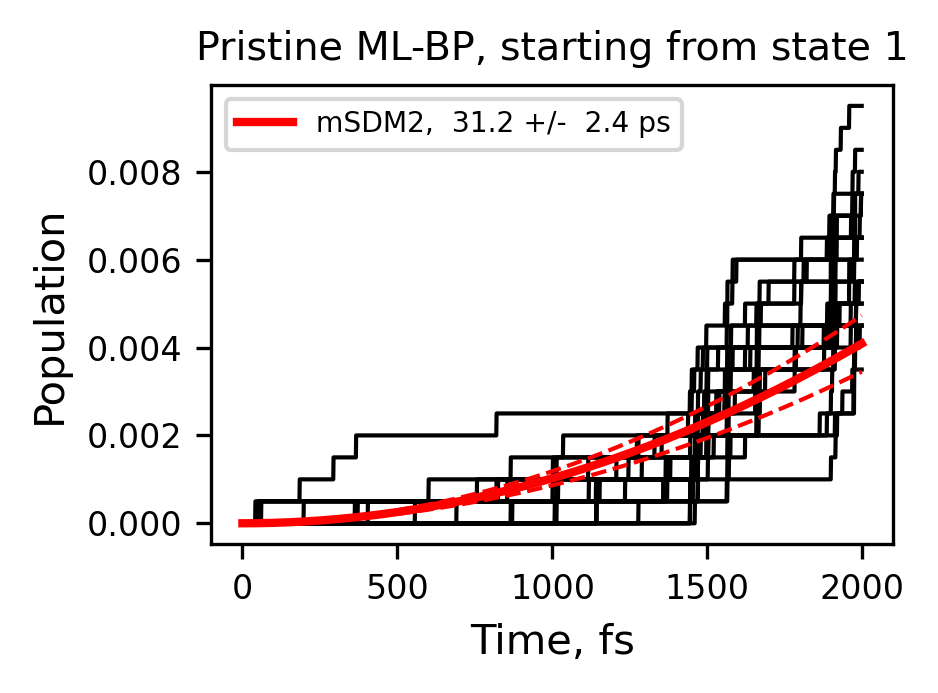

    *** Running decoherence method 3 ( DISH ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  8.465192021860826e-10  1/B =  1181308111.4020367
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  6.140913421377887e-10  1/B =  1628422241.744652
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  8.465192021860826e-10  1/B =  1181308111.4020367
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  8.884807457165939e-10  1/B =  1125516793.4938889
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  7.583675668092951e-10  1/B =  1318621792.0781252
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.1314258520799546e-10  1/B =  2420471855.9732904
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.038762503379955e-10  1/B =  1984614276.4800074
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  8.465192021860826e-10  1/B =  1181308111.4020367
raw data leng

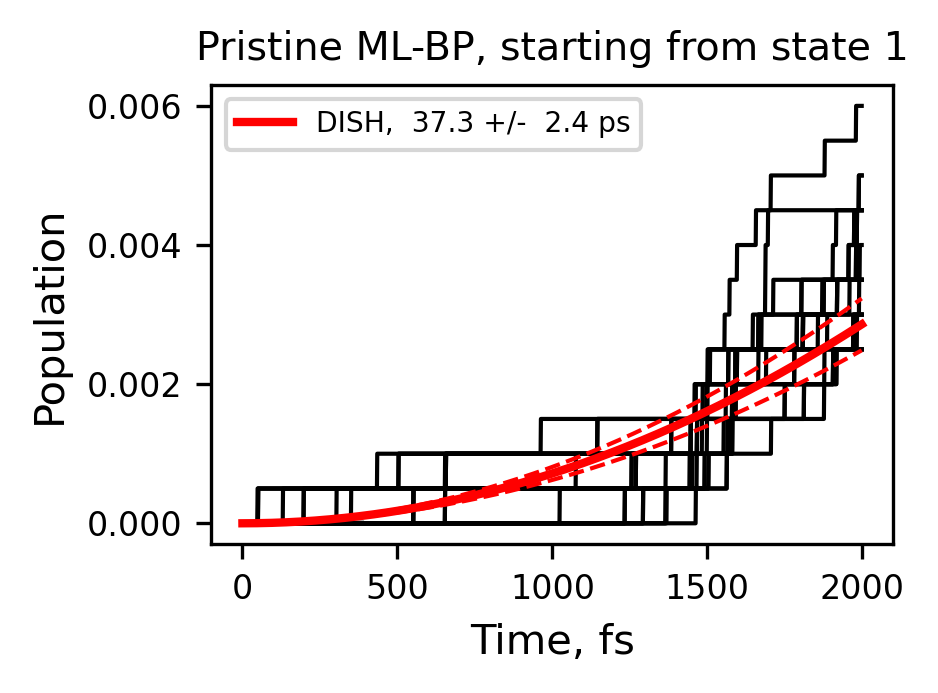

    *** Running decoherence method 31 ( DISH2 ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.043152339520441e-10  1/B =  2473317639.3709917
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.8500169633957817e-10  1/B =  5405355841.51866
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.7542108747388277e-10  1/B =  5700568924.753036
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.7542108747388277e-10  1/B =  5700568924.753036
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.5255214362563906e-10  1/B =  3959578349.4212246
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.872733616588279e-10  1/B =  1702784538.3202357
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.4663071107322466e-09  1/B =  681985371.7415437
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.604301332619141e-10  1/B =  1784343740.0120225
raw data le

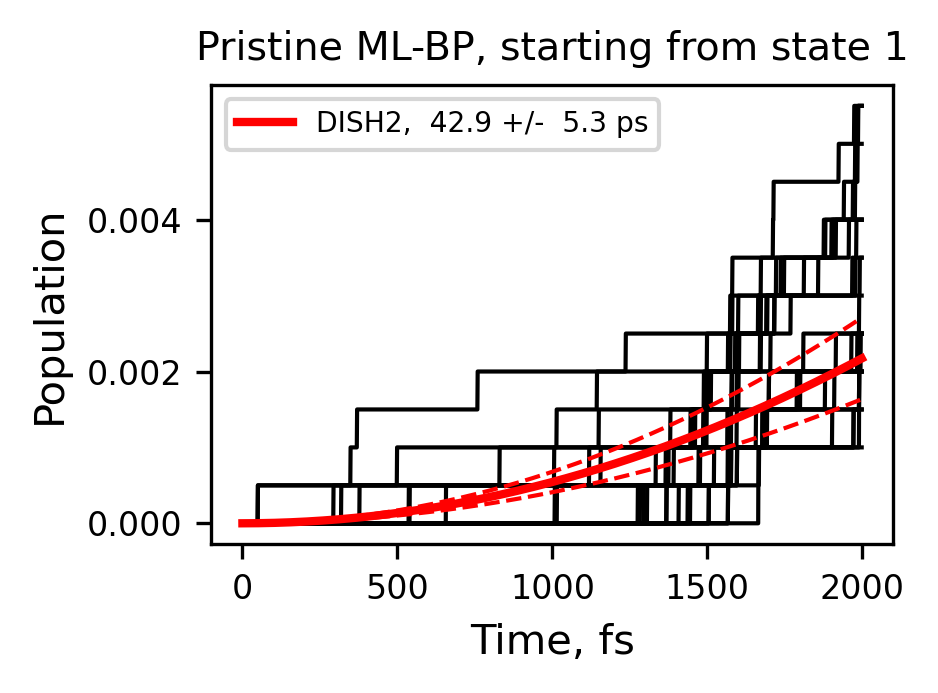

======= Running initial state 2 =======
    *** Running decoherence method 0 ( FSSH ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.603335619651811e-05  1/B =  17846.51264673201
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.936310904192425e-05  1/B =  16845.478886453977
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.542502487487669e-05  1/B =  18042.391541682187
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  6.009589285409739e-05  1/B =  16640.07226629996
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  6.16057974747753e-05  1/B =  16232.238539066931
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  6.418586640134556e-05  1/B =  15579.75386274503
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.936310904192425e-05  1/B =  16845.478886453977
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  6.009589285409739e-05  1/B

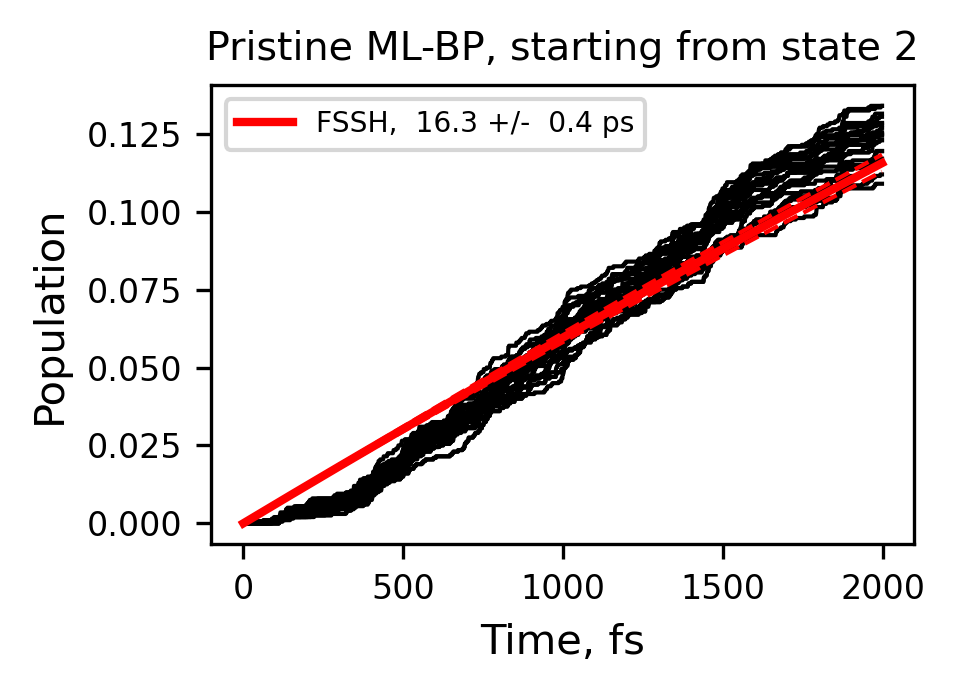

    *** Running decoherence method 1 ( IDA ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.46814485656704e-06  1/B =  405162.6051604228
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.3849833080914993e-06  1/B =  722030.3625016214
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.447572115912783e-06  1/B =  690811.8697557522
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.9136408579896573e-06  1/B =  522564.0933746225
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.5618410493341184e-06  1/B =  390344.2800481018
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  3.7811801991993638e-06  1/B =  264467.6919158051
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.457244574729318e-06  1/B =  406959.89739245095
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.620912966242616e-06  1/B =  381546.43549023167
raw data lengths:

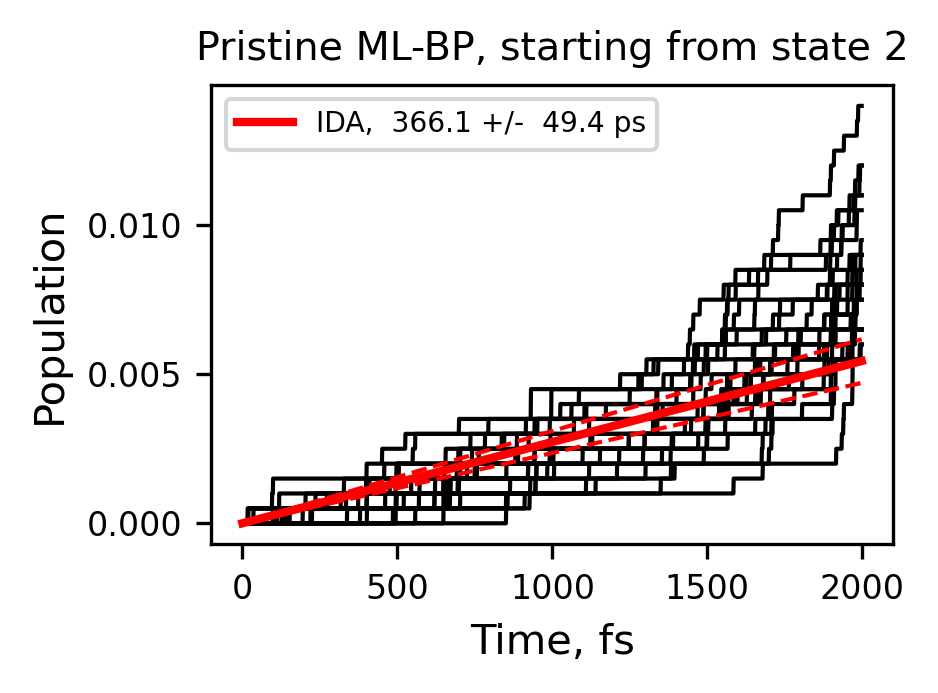

    *** Running decoherence method 2 ( mSDM ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.9936780437212563e-06  1/B =  501585.5008030644
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.7814750676036555e-06  1/B =  561332.5822994235
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.043278333816643e-06  1/B =  489409.5843184018
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.3161879923492768e-06  1/B =  759769.8853148555
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.9718323138793275e-06  1/B =  507142.5155989193
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.6929528852784913e-06  1/B =  371339.5824586011
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.072283345631011e-06  1/B =  482559.4927007917
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.9234339493166496e-06  1/B =  519903.4780244345
raw data length

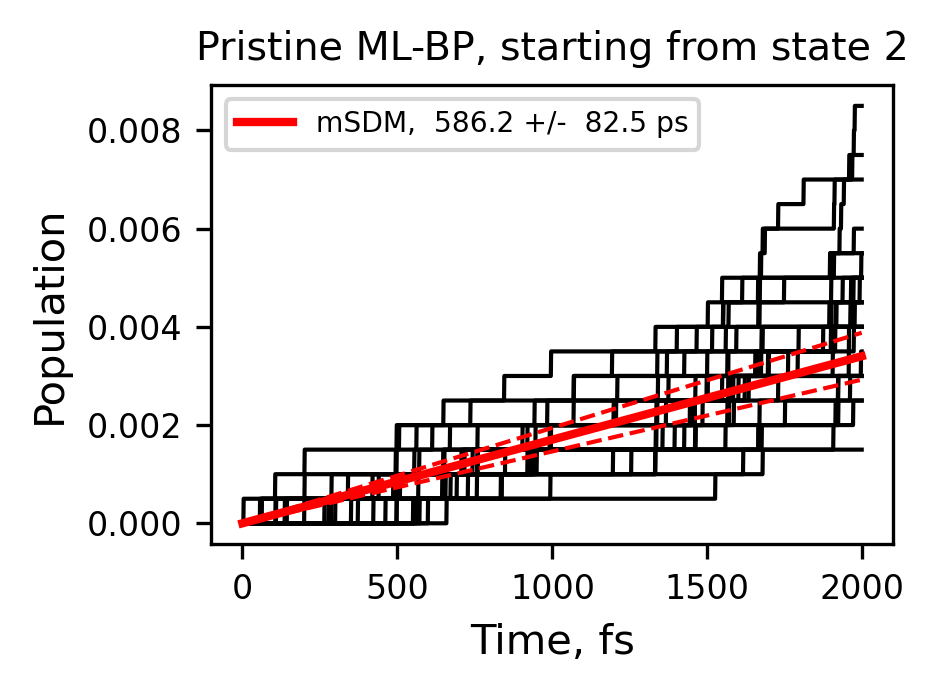

    *** Running decoherence method 21 ( mSDM2 ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.7931479966865694e-06  1/B =  358018.9811589902
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.3216557991834742e-06  1/B =  756626.6501594479
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.879049083974258e-06  1/B =  347336.90563538205
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  6.183990974041896e-07  1/B =  1617078.6862361697
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.5959936867522138e-06  1/B =  626568.8945392772
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.869413236090879e-06  1/B =  534927.2064057357
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  3.2805729813462884e-06  1/B =  304824.7991086051
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.3598992428317314e-06  1/B =  735348.5967958113
raw data len

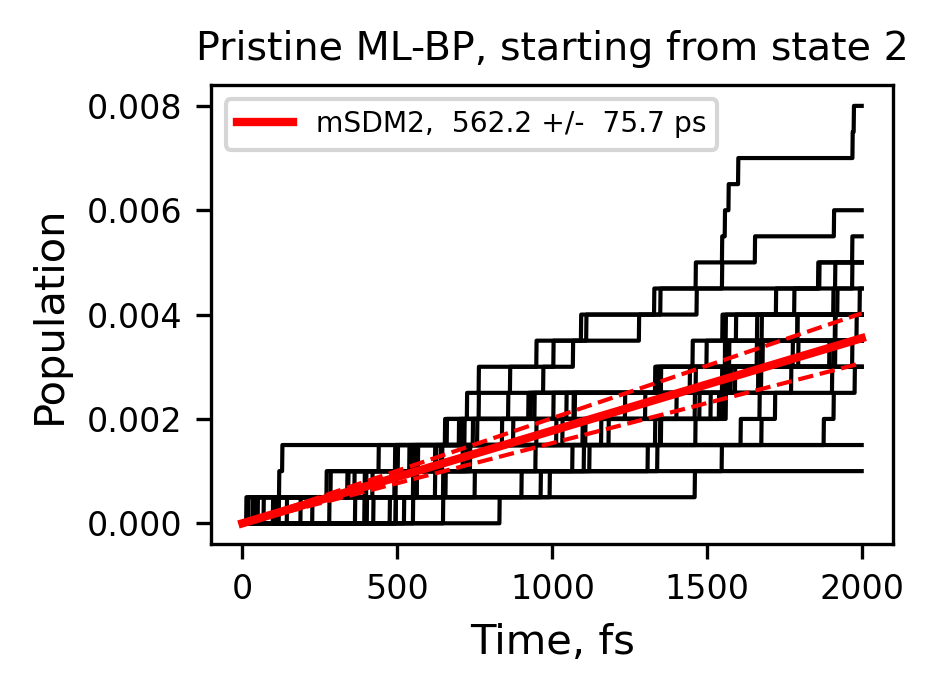

    *** Running decoherence method 3 ( DISH ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.0275088089452094e-07  1/B =  2482924.426580948
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.5304768812348067e-06  1/B =  653391.1176712373
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.5304768812348067e-06  1/B =  653391.1176712373
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  7.519486197924248e-07  1/B =  1329878.0976232789
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  3.7590751805830703e-07  1/B =  2660228.784902594
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.8144606144981564e-06  1/B =  551127.9726931852
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  7.34713064391467e-07  1/B =  1361075.5660487125
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.2296980561796434e-06  1/B =  813207.7585832279
raw data lengt

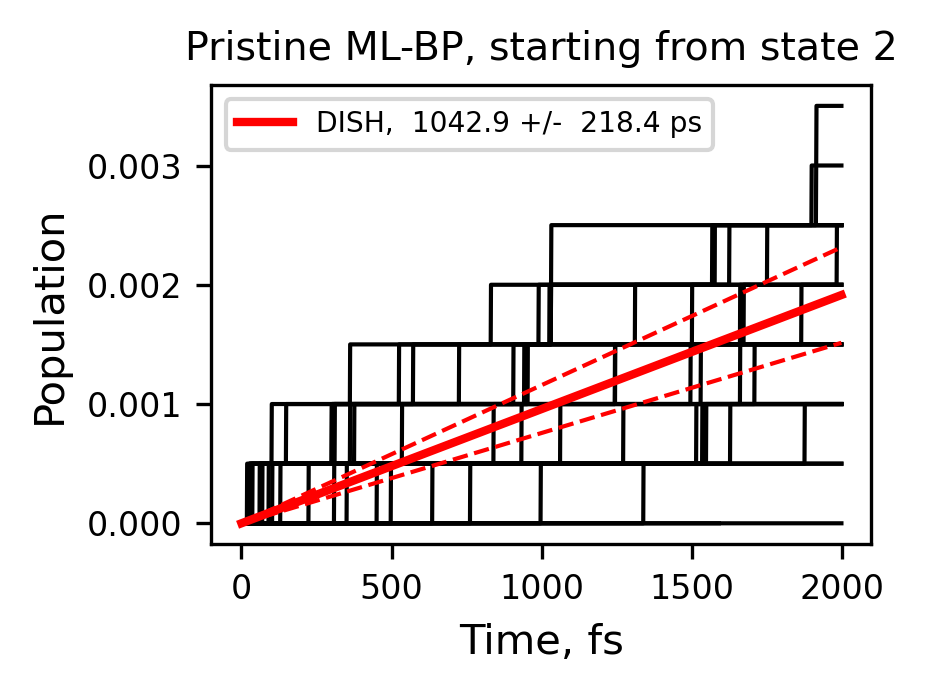

    *** Running decoherence method 31 ( DISH2 ) *** 
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.2597034082832985e-07  1/B =  7938376.552960052
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  5.060302471504695e-08  1/B =  19761664.557230454
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  6.316418037409787e-07  1/B =  1583175.7715803056
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  4.941142792332126e-07  1/B =  2023823.31786048
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  1.349001790834748e-06  1/B =  741288.8602477026
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  2.8725244717712784e-07  1/B =  3481258.4186040796
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  8.45214390901745e-07  1/B =  1183131.7719674848
raw data lengths: 1999 1999
Fitting parameters : A =  1.0  and B =  9.71928240046999e-07  1/B =  1028882.5437890801
raw data length

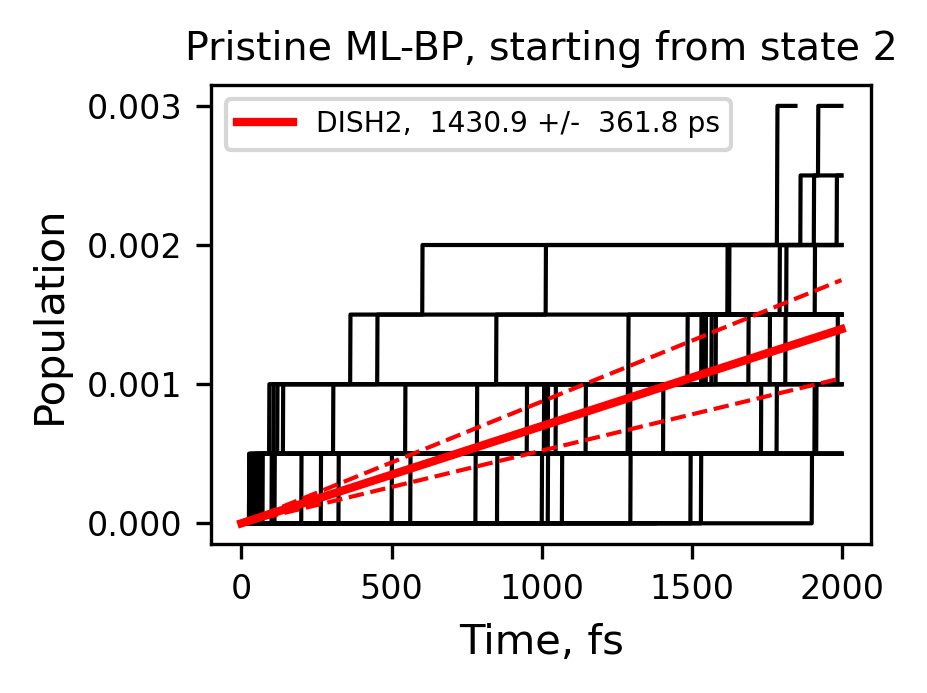

In [2]:
plt.rc('axes', titlesize=12)      # fontsize of the axes title
plt.rc('axes', labelsize=12)      # fontsize of the x and y labels
plt.rc('legend', fontsize=10)     # legend fontsize
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)


methods = {0:"FSSH", 1:"IDA", 2:"mSDM", 21:"mSDM2", 3:"DISH", 31:"DISH2"}

init_states = [1, 2]
tsh_methods = [0, 1, 2, 21, 3, 31]
batches = list(range(25))

prefix = "namd_res"
all_time = np.array( list(range(1999) ) ) #* units.au2fs

for istate in init_states:  # initial states       
    print(F"======= Running initial state {istate} =======")
    for method in tsh_methods:  # decoherence method: FSSH, IDA, mSDM, DISH                        
        name = methods[method]
        print(F"    *** Running decoherence method {method} ( {name} ) *** ")
        
        figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=300, edgecolor='black', frameon=True)        
        name = methods[method]        
                
        tau, tau2 = [], []
        rat, rat2 = [], []
        for batch in batches:        
                        
            infile1 = F"{prefix}/start_s{istate}_{name}_batch{batch}/time.txt"
            infile2 = F"{prefix}/start_s{istate}_{name}_batch{batch}/SH_pop.txt"
                                    
            # Plot the raw data
            t = np.array(data_read.get_data_from_file2(infile1, [0])[0]) * units.au2fs
            p = np.array(data_read.get_data_from_file2(infile2, [0,1,2,3]))
            
            print(F"raw data lengths: { len(t)} { len(p[0]) }")
                        
            if batch==0:
                plt.plot(t, p[0], color="black", label="", linewidth=1)      
                #plt.plot(t, p[1], color="red", label="P1", linewidth=1)      
                #plt.plot(t, p[2], color="blue", label="P2", linewidth=1)      
                #plt.plot(t, p[3], color="green", label="P3", linewidth=1)      
            else:
                plt.plot(t, p[0], color="black", label="", linewidth=1)      
                #plt.plot(t, p[0], color=colors[ clrs_index[batch] ], label="", linewidth=1)
                
                #plt.plot(t, p[1], color="red", label="", linewidth=1)      
                #plt.plot(t, p[2], color="blue", label="", linewidth=1)      
                #plt.plot(t, p[3], color="green", label="", linewidth=1)      
            
                        
            
            T = []
            P = []
            for ia, a in enumerate(p[0]):
                T.append(t[ia])
                P.append(p[0, ia])
                                                
            if sum(P) > 0.01 and len(p[0]) > 1500:
                
                # Use a well-behaved subset of data for fitting                        
                pop = 1.0 - np.array(P)
            
                # Do the fitting and collect the results
                verb, opt = 0, 0
                
                fit_res, fit_a, fit_b = None, None, None
                if istate in [1] and method in [0,1,2,21,3,31]:
                    fit_res, fit_a, fit_b = fit.fit_gau(T, pop, 0.0, verb, opt)  
                    r = fit_b                    
                    rat2.append( r )            # 1/tau^2
                    rat.append( math.sqrt(r) )  # 1/tau                                         
                    tau2.append( 1.0/r )           # tau^2
                    tau.append(1.0/math.sqrt(r) )  # tau                    
                    
                else:
                    fit_res, fit_a, fit_b = fit.fit_exp(T, pop, 0.0, verb, opt)                  
                    r = fit_b                                        
                    rat2.append(r**2)            # 1/tau^2
                    rat.append( r )              # 1/tau                                        
                    tau2.append( 1.0/(r**2) )    # tau^2
                    tau.append(1.0/r )           # tau
                                                                                                
                print( "Fitting parameters : A = ", fit_a, " and B = ", fit_b, " 1/B = ", 1/fit_b)                                                
            else:
                pass
        
        n = len(rat)
        
        if n > 0:
            print(F"Number of samples = {n}")
            
            # Prefactor for 95% confidence interval
            # The error bars reporting is :  average +/-  prefactor * standard_deviation
            prefactor = 1.96/math.sqrt(n)
            
            # Statistical analysis of the obtained timescales
            rat_stat = DATA(rat); rat_stat.Calculate_Estimators()
            rat2_stat = DATA(rat2); rat2_stat.Calculate_Estimators()            
            tau_stat = DATA(tau); tau_stat.Calculate_Estimators()
            tau2_stat = DATA(tau2); tau2_stat.Calculate_Estimators()            
            
            
            print(F"Lifetime from averaging individual lifetimes {tau_stat.ave} +/- { prefactor * tau_stat.sd }")
            print(F"Average rates  {rat_stat.ave} +/- { prefactor * rat_stat.sd }")  
                                                
            
            # Plot the average fitting     
            Y, Y1, Y2 = None, None, None
            TAU, ERR = None, None
            if istate in [1] and method in [0,1,2,21,3,31]:   
                """
                tau = <r2> ^ {-1/2}
                d tau = - 1/2 <r2>^ {-3/2} * d( r2)
                """
                
                TAU = 1.0/math.sqrt(rat2_stat.ave)
                ERR = prefactor * 0.5 * TAU**3 * rat2_stat.sd # tau_stat.sd #( tau_stat.ave / rat_stat.ave) *rat_stat.sd
                                
                
                print(F"Lifetime { TAU } +/- { ERR }")    
                Y = 1.0 - np.exp(-(all_time**2 * (rat2_stat.ave) )  )
                Y1 = 1.0 - np.exp(-(all_time**2 * (rat2_stat.ave - prefactor * rat2_stat.sd) )  )
                Y2 = 1.0 - np.exp(-(all_time**2 * (rat2_stat.ave + prefactor * rat2_stat.sd) )  ) 
                
                                                            
            else:   
                """
                tau = <r> ^ {-1}
                d tau = - <r>^ {-2} * d(r)
                """
                
                TAU = 1.0/rat_stat.ave
                ERR = prefactor * TAU**2 * rat_stat.sd 
                
                print(F"Lifetime {TAU} +/- { ERR }")
                Y = 1.0 - np.exp(-(all_time * rat_stat.ave ) ) 
                Y1 = 1.0 - np.exp(-(all_time * (rat_stat.ave - prefactor * rat_stat.sd ) )  )
                Y2 = 1.0 - np.exp(-(all_time * (rat_stat.ave + prefactor * rat_stat.sd) )  )                                
                                        
                    
            plt.plot(all_time , Y, color="red", 
                     label=F"{name}, {TAU/1000.0 : 3.1f} +/- {ERR/1000.0 : 3.1f} ps", 
                     linewidth=2 )
            plt.plot(all_time, Y1, color="red", label=F"", linewidth=1, linestyle='dashed' )
            plt.plot(all_time, Y2, color="red", label=F"", linewidth=1, linestyle='dashed' )
            
                            
                    
        plt.title(F"Pristine ML-BP, starting from state {istate}",fontsize=9.5)
        plt.legend(fontsize=6.75, ncol=1, loc='upper left')
        plt.xlabel('Time, fs',fontsize=10)
        plt.ylabel('Population',fontsize=10)
        plt.tight_layout()
        plt.savefig(F'{prefix}/start_s{istate}_{name}.png', dpi=300)
        plt.show()